In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#displaying column and data in dictionary format for 'station'
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb0bdaf14a8>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [10]:
#displaying column and data in dictionary format for 'measurement'
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb0bdaf1a20>,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent

('2017-08-23')

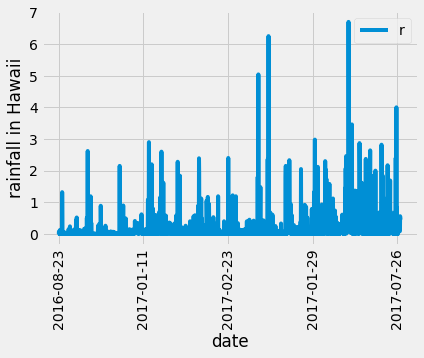

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_months = dt.date(2017,8,23)- dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date>=twelve_months).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prep_data = pd.DataFrame(data)


# Sort the dataframe by date
clean_prep=prep_data.dropna().set_index(['date'])
# # Use Pandas Plotting with Matplotlib to plot the data
clean_prep.plot()
plt.xticks(rotation = 'vertical')
plt.ylabel('rainfall in Hawaii')
plt.legend('rainfall')



In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_prep.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number stations in the dataset
total_stations = len(session.query(station.station).all())
total_stations

9

In [110]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
_data= session.query(measurement.station, measurement.id, measurement.tobs, measurement.prcp, measurement.date)
station_data= pd.DataFrame(_data).dropna()
#displaying the most active stations
station_data['station'].value_counts()



USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64

In [111]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#highest recorded temperature
high_temp=station_data[station_data['station']=='USC00519281'].max()
#lowest recorded temperature
low_temp=station_data[station_data['station']=='USC00519281'].min()
#average recorded temperature
avg_temp=station_data[station_data['station']=='USC00519281'].mean()
print(high_temp)
print(low_temp)
print(avg_temp)


station    USC00519281
id               14959
tobs                85
prcp              9.64
date        2017-08-18
dtype: object
station    USC00519281
id               12188
tobs                54
prcp                 0
date        2010-01-01
dtype: object
id      13573.500000
tobs       71.663781
prcp        0.212352
dtype: float64


Text(0, 0.5, 'frequency')

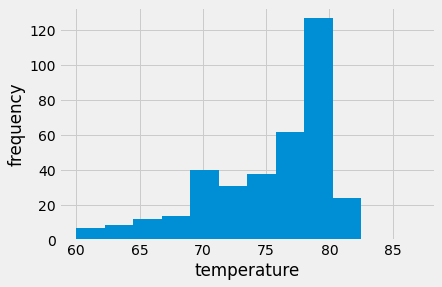

In [139]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [measurement.date,
      measurement.tobs]
twelve_month_temps = session.query(*sel).\
    group_by(measurement.date).\
    filter(measurement.date>=(twelve_months)).all()
data_=pd.DataFrame(twelve_month_temps).set_index(['date'])
plt.hist(data_, bins = 12)
plt.xlabel('temperature')
plt.ylabel('frequency')

# Close session

In [140]:
# Close Session
session.close()